In [2]:
import os, sys, time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
import konlpy
from konlpy.tag import Komoran, Mecab, Okt, Twitter
%matplotlib inline
print('konlpy version = {}'.format(konlpy.__version__))

/Users/jychoi/anaconda3/envs/ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jychoi/anaconda3/envs/ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jychoi/anaconda3/envs/ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/jychoi/anaconda3/envs/ml/lib/python3.6/site-pack

konlpy version = 0.5.2


In [3]:
dataset = pd.read_csv('total_dataset.csv', index_col = False)

In [4]:
dataset = dataset.sample(frac = 1).reset_index(drop = True)

In [5]:
train_data = dataset[:round(dataset.shape[0]*0.9)]
test_data = dataset[round(dataset.shape[0]*0.9):]

In [6]:
train_data['rank'].value_counts()

0    24669
1    24552
Name: rank, dtype: int64

In [7]:
test_data['rank'].value_counts()

1    2791
0    2678
Name: rank, dtype: int64

In [8]:
del dataset

In [9]:
train_data['contents'] = train_data['contents'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data['contents'] = test_data['contents'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [10]:
train_data.drop(train_data[train_data.contents == ' '].index, inplace=True)
train_data.drop(train_data[train_data.contents == '  '].index, inplace=True)
train_data.drop(train_data[train_data.contents == '   '].index, inplace=True)
train_data.drop(train_data[train_data.contents == '    '].index, inplace=True)
train_data.drop(train_data[train_data.contents == '     '].index, inplace=True)
train_data.drop(train_data[train_data.contents == '      '].index, inplace=True)
train_data.drop(train_data[train_data.contents == '       '].index, inplace=True)
train_data.drop(train_data[train_data.contents == '        '].index, inplace=True)

In [11]:
test_data.drop(test_data[test_data.contents == ' '].index, inplace=True)
test_data.drop(test_data[test_data.contents == '  '].index, inplace=True)
test_data.drop(test_data[test_data.contents == '   '].index, inplace=True)
test_data.drop(test_data[test_data.contents == '    '].index, inplace=True)
test_data.drop(test_data[test_data.contents == '     '].index, inplace=True)
test_data.drop(test_data[test_data.contents == '      '].index, inplace=True)
test_data.drop(test_data[test_data.contents == '       '].index, inplace=True)
test_data.drop(test_data[test_data.contents == '        '].index, inplace=True)

In [12]:
train_data.dropna(subset = ['contents'], inplace = True)
test_data.dropna(subset = ['contents'], inplace = True)

In [13]:
# ko_tokenizer setup
ko_tokenizer = Komoran()
stopwords = ['']

In [14]:
# sentence word tokenizing for train_data
s = time.time()
x_train = []
for i, sentence in enumerate(train_data['contents']):
    temp_X = []
    temp_X = list(ko_tokenizer.morphs(sentence)) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords]
    x_train.append(temp_X)
print('train sentence word tokenizing time = {:.3f}'.format(time.time() - s))

train sentence word tokenizing time = 55.038


In [15]:
x_train[0]

['밴드', '부분', '이', '쪼', 'ㅁ', '크', '네요']

In [16]:
# sentensce word tokenizing for test_data
s = time.time()
x_test =[]
for i, sentence in enumerate(test_data['contents']):
    temp_x = []
    temp_x = list(ko_tokenizer.morphs(sentence))
    temp_x = [word for word in temp_x if not word in stopwords]
    x_test.append(temp_x)
print('test sentence word tokenizing time = {:.3f}'.format(time.time()-s))

test sentence word tokenizing time = 7.200


In [17]:
# 띄어쓰기한 train contents로 변환
tmp_train = []
for sentence in x_train:
    tmp_x = ' '.join(sentence)
    tmp_train.append(tmp_x)

train_data['contents'] = tmp_train

In [18]:
# 띄어쓰기한 train contents로 변환
tmp_test = []
for sentence in x_test:
    tmp_x = ' '.join(sentence)
    tmp_test.append(tmp_x)

test_data['contents'] = tmp_test

In [19]:
# word를 index vector로 변환
from tensorflow.keras.preprocessing.text import Tokenizer
t= Tokenizer()
t.fit_on_texts(train_data['contents'])
vocab_size = len(t.word_index)+1
print('vocab_size = {}'.format(vocab_size))

vocab_size = 26103


In [20]:
s = time.time()
train_sent_onehot = t.texts_to_sequences(train_data['contents'])
print('train_sent_onehot generation time = {:.2f}'.format(time.time()-s))

train_sent_onehot generation time = 1.43


In [21]:
train_sent_onehot

[[1118, 143, 2, 770, 65, 89, 9],
 [187,
  1980,
  453,
  2,
  63,
  642,
  100,
  609,
  3557,
  168,
  20,
  29,
  3363,
  1585,
  3796,
  101,
  3364,
  1648,
  7,
  1915,
  2,
  1124,
  149,
  2073,
  4,
  2545,
  317,
  12058,
  2,
  80,
  1750,
  536,
  2,
  1396,
  2,
  20,
  364,
  1593,
  523,
  254,
  3,
  1980,
  5665,
  704,
  1,
  21,
  7245,
  11,
  35,
  9,
  502],
 [108, 1037, 17],
 [278,
  630,
  18,
  4589,
  34,
  2,
  175,
  72,
  80,
  928,
  1807,
  445,
  6,
  1885,
  142,
  393,
  9,
  1066,
  6,
  560,
  16,
  338,
  50,
  3922,
  7,
  37,
  100,
  188,
  68,
  137,
  40,
  222,
  482,
  12059,
  139,
  26,
  2499,
  48,
  2682,
  34,
  507,
  12,
  23,
  71,
  12060,
  1,
  4,
  969,
  50,
  255,
  66,
  183,
  180,
  150,
  10,
  33,
  4,
  1326,
  159,
  18,
  115,
  691,
  1239,
  1,
  21,
  37,
  36,
  26],
 [471,
  143,
  2,
  48,
  119,
  15,
  151,
  384,
  1,
  9,
  2461,
  8,
  928,
  415,
  6,
  22,
  10,
  165,
  2,
  384],
 [30, 174, 48, 273, 3, 75,

In [22]:
s = time.time()
test_sent_onehot = t.texts_to_sequences(test_data['contents'])
print('test_sent_onehot generation time = {:.2f}'.format(time.time()-s))

test_sent_onehot generation time = 0.15


max length of contents :  1140
average length of contents :  33.97974153696103


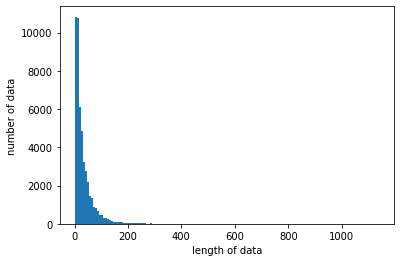

In [23]:
print('max length of contents : ', max(len(l) for l in x_train))
print('average length of contents : ', sum(map(len, x_train))/len(x_train))
plt.hist([len(s) for s in x_train], bins =150)
plt.xlabel('length of data')
plt.ylabel('number of data')
plt.show()

In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train_sent_onehot, maxlen = 300, padding = 'pre')
x_test = pad_sequences(test_sent_onehot, maxlen = 300, padding = 'pre')
y_train = train_data['rank'].to_numpy()
y_test = test_data['rank'].to_numpy()

In [25]:
x_train

array([[   0,    0,    0, ...,   65,   89,    9],
       [   0,    0,    0, ...,   35,    9,  502],
       [   0,    0,    0, ...,  108, 1037,   17],
       ...,
       [   0,    0,    0, ..., 1357,    1,    9],
       [   0,    0,    0, ...,  329,   83,   32],
       [   0,    0,    0, ...,  173,   41,   14]], dtype=int32)

In [79]:
import argparse
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv1D, LSTM, GRU, Bidirectional, Embedding, Dropout, concatenate, Flatten, Activation, MaxPooling1D, GlobalMaxPool1D, GlobalMaxPooling1D, GlobalAveragePooling1D, SpatialDropout1D
from tensorflow.keras import initializers, regularizers, constraints, optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import multi_gpu_model

In [102]:
def build_model(args):
    inputs = Input(shape=(args.max_length,))
    if args.embedding_matrix is None:
        output = Embedding(vocab_size, 300, trainable = True)(inputs)
    else:
        output = Embedding(vocab_size, 300, trainable = False, weights=[embedding_matrix])(inputs)    
#     output = Embedding(vocab_size, 300, input_length=args.max_length)(inputs)
    output = Bidirectional(LSTM(100, return_sequences = True, dropout = args.dropout, recurrent_dropout = 0.1))(output)
    output = GlobalMaxPool1D()(output)
    output = Dense(100, activation = args.activation,kernel_regularizer=regularizers.l2(1e-4))(output)
    output = Dropout(args.dropout)(output)
    preds = Dense(1, activation = 'sigmoid')(output)
    model = Model(inputs, preds)
    try:
        model = multi_gpu_model(model, cpu_relocation = True)
# model = multi_gpu_model(model, gpus = 2, cpu_relocation = True)
        print('#'*50)
        print('====> training using multiple gpu')
        print('#'*50)
    except:
        print('#'*50)
        print('====> training using single gpu or cpu')
        print('#'*50)
    return model

def build_deep_model(args):
    inputs = Input(shape=(args.max_length,))
    output = Embedding(vocab_size, 300, input_length=args.max_length)(inputs)
    output = Bidirectional(LSTM(100, return_sequences = True, dropout = args.dropout, recurrent_dropout = 0.2))(output)
    output = Bidirectional(LSTM(100, return_sequences = True, dropout = args.dropout, recurrent_dropout = 0.2))(output)
    output = GlobalMaxPool1D()(output)
    output = Dense(100, activation = args.activation)(output)
    output = Dropout(args.dropout)(output)
    preds = Dense(1, activation = 'sigmoid')(output)
    model = Model(inputs, preds)
    try:
        model = multi_gpu_model(model, cpu_relocation = True)
# model = multi_gpu_model(model, gpus = 2, cpu_relocation = True)
        print('#'*50)
        print('====> training using multiple gpu')
        print('#'*50)
    except:
        print('#'*50)
        print('====> training using single gpu or cpu')
        print('#'*50)
    return model

def build_conv1d_model(args):
    inputs = Input(shape=(args.max_length, ))
    output = Embedding(vocab_size, 300, input_length=args.max_length)(inputs)
    output = SpatialDropout1D(0.2)(output)
    output = Bidirectional(GRU(128, return_sequences=True,dropout=0.1,recurrent_dropout=0.1))(output)
    output = Conv1D(64, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(output)
    avg_pool = GlobalAveragePooling1D()(output)
    max_pool = GlobalMaxPooling1D()(output)
    output = concatenate([avg_pool, max_pool]) 
    output = Dense(64, activation='relu')(output)
    output = Dropout(0.1)(output)
    preds = Dense(1, activation="sigmoid")(output)
    model = Model(inputs, preds)
    try:
        model = multi_gpu_model(model, cpu_relocation = True)
    # model = multi_gpu_model(model, gpus = 2, cpu_relocation = True)
        print('#'*50)
        print('====> training using multiple gpu')
        print('#'*50)
    except:
        print('#'*50)
        print('====> training using single gpu or cpu')
        print('#'*50)
    return model


In [93]:
model_dir = 'model'
if not os.path.exists(model_dir):
    os.makedir(model_dir)

In [94]:
checkpoint_path = 'model/cp_{}.ckpt'.format(time.strftime('%Y-%m-%d',time.localtime(time.time())))
checkpoint_dir = os.path.dirname(checkpoint_path)

In [95]:
# callback setup
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 10,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                                 factor = 0.1,
                                 patience = 3,
                                 min_lr = 0.00001)

cp_callback = ModelCheckpoint(checkpoint_path,
                             save_weights_only = True,
                             save_best_only = True,
                             verbose = 1)

In [103]:
args = argparse.ArgumentParser()
# hyper parameter setup
args.learner = 'adam'
args.activation = 'relu'
args.learning_rate = 0.001
args.dropout = 0.3
# args.max_length = max(len(l) for l in x_train)
args.max_length = 300
args.validation_split = 0.2
args.epoch = 50
args.train_batch_size = 512
args.test_batch_size = 512
args.embedding_matrix = None

model = build_model(args)
print(model.summary())

if args.learner.lower() == "adagrad":
    model.compile(optimizer=optimizers.Adagrad(lr=args.learning_rate),
                 loss=losses.binary_crossentropy,
                 metrics=[metrics.binary_accuracy])
elif args.learner.lower() == "rmsprop":
    model.compile(optimizer=optimizers.RMSprop(lr=args.arglearning_rate),
                 loss=losses.binary_crossentropy,
                 metrics=[metrics.binary_accuracy])    
elif args.learner.lower() == "adam":
    model.compile(optimizer=optimizers.Adam(lr=args.learning_rate),
                 loss=losses.binary_crossentropy,
                 metrics=[metrics.binary_accuracy])
else:
    model.compile(optimizer=optimizers.SGD(lr=args.learning_rate),
                 loss=losses.binary_crossentropy,
                 metrics=[metrics.binary_accuracy])

##################################################
====> training using single gpu or cpu
##################################################
Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 300)]             0         
_________________________________________________________________
embedding_17 (Embedding)     (None, 300, 300)          7833900   
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 300, 200)          320800    
_________________________________________________________________
global_max_pooling1d_13 (Glo (None, 200)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)         

In [104]:
# 1 layer bdlstm
history = model.fit(x_train, y_train, 
              epochs=args.epoch, 
              batch_size=args.train_batch_size, 
              validation_split = args.validation_split, 
              callbacks = [earlystop, reduce_lr, cp_callback])

Train on 39372 samples, validate on 9843 samples
Epoch 1/50
38912/39372 [============================>.] - ETA: 3s - loss: 0.3515 - binary_accuracy: 0.8474
Epoch 00001: val_loss did not improve from 0.15599
39372/39372 [==============================] - 354s 9ms/sample - loss: 0.3496 - binary_accuracy: 0.8484 - val_loss: 0.1782 - val_binary_accuracy: 0.9366
Epoch 2/50
38912/39372 [============================>.] - ETA: 3s - loss: 0.1573 - binary_accuracy: 0.9488
Epoch 00002: val_loss did not improve from 0.15599
39372/39372 [==============================] - 365s 9ms/sample - loss: 0.1576 - binary_accuracy: 0.9487 - val_loss: 0.1669 - val_binary_accuracy: 0.9384
Epoch 3/50
38912/39372 [============================>.] - ETA: 3s - loss: 0.1234 - binary_accuracy: 0.9637
Epoch 00003: val_loss did not improve from 0.15599
39372/39372 [==============================] - 347s 9ms/sample - loss: 0.1232 - binary_accuracy: 0.9637 - val_loss: 0.1658 - val_binary_accuracy: 0.9419
Epoch 4/50
38912/3

In [48]:
# 2 layer bdlstm
history = bdlstm_model.fit(x_train, y_train, 
              epochs=args.epoch, 
              batch_size=args.train_batch_size, 
              validation_split = args.validation_split, 
              callbacks = [earlystop, reduce_lr, cp_callback])

Train on 39372 samples, validate on 9843 samples
Epoch 1/50
38912/39372 [============================>.] - ETA: 6s - loss: 0.3366 - binary_accuracy: 0.8510 
Epoch 00001: val_loss improved from inf to 0.17794, saving model to model/cp_2020-03-05.ckpt
39372/39372 [==============================] - 596s 15ms/sample - loss: 0.3347 - binary_accuracy: 0.8520 - val_loss: 0.1779 - val_binary_accuracy: 0.9329
Epoch 2/50
38912/39372 [============================>.] - ETA: 6s - loss: 0.1553 - binary_accuracy: 0.9462 
Epoch 00002: val_loss improved from 0.17794 to 0.16802, saving model to model/cp_2020-03-05.ckpt
39372/39372 [==============================] - 599s 15ms/sample - loss: 0.1554 - binary_accuracy: 0.9463 - val_loss: 0.1680 - val_binary_accuracy: 0.9369
Epoch 3/50
38912/39372 [============================>.] - ETA: 6s - loss: 0.1211 - binary_accuracy: 0.9614 
Epoch 00003: val_loss improved from 0.16802 to 0.16650, saving model to model/cp_2020-03-05.ckpt
39372/39372 [===================

In [97]:
# conv1d_model
history = model.fit(x_train, y_train, 
              epochs=args.epoch, 
              batch_size=args.train_batch_size, 
              validation_split = args.validation_split, 
              callbacks = [earlystop, reduce_lr, cp_callback])

Train on 39372 samples, validate on 9843 samples
Epoch 1/50
38912/39372 [============================>.] - ETA: 3s - loss: 0.3001 - binary_accuracy: 0.8685
Epoch 00001: val_loss improved from inf to 0.16199, saving model to model/cp_2020-03-05.ckpt
39372/39372 [==============================] - 368s 9ms/sample - loss: 0.2985 - binary_accuracy: 0.8694 - val_loss: 0.1620 - val_binary_accuracy: 0.9382
Epoch 2/50
38912/39372 [============================>.] - ETA: 3s - loss: 0.1407 - binary_accuracy: 0.9528
Epoch 00002: val_loss improved from 0.16199 to 0.15599, saving model to model/cp_2020-03-05.ckpt
39372/39372 [==============================] - 362s 9ms/sample - loss: 0.1404 - binary_accuracy: 0.9529 - val_loss: 0.1560 - val_binary_accuracy: 0.9412
Epoch 3/50
38912/39372 [============================>.] - ETA: 4s - loss: 0.1080 - binary_accuracy: 0.9656
Epoch 00003: val_loss did not improve from 0.15599
39372/39372 [==============================] - 383s 10ms/sample - loss: 0.1078 - bi